# Notebook to export (T)CAV Accuracy results 

In [1]:
import pickle
import numpy as np
import pandas as pd

In [2]:
PATH = '/work3/s174498/nlp_tcav_results/'
PATH_save = '/zhome/94/5/127021/speciale/master_project/src/visualization/table/'

In [3]:
layers = ['roberta.encoder.layer.0.output.dropout',
             'roberta.encoder.layer.1.output.dropout',
             'roberta.encoder.layer.2.output.dropout',
             'roberta.encoder.layer.3.output.dropout',
             'roberta.encoder.layer.4.output.dropout',
             'roberta.encoder.layer.5.output.dropout',
             'roberta.encoder.layer.6.output.dropout',
             'roberta.encoder.layer.7.output.dropout',
             'roberta.encoder.layer.8.output.dropout',
             'roberta.encoder.layer.9.output.dropout',
             'roberta.encoder.layer.10.output.dropout',
             'roberta.encoder.layer.11.output.dropout'
            ]


### Sports

In [4]:
#mat = np.zeros((len(concepts),12))

In [5]:
folders =  ['Acrobatic sports','Air sports','Aquatic and paddle sports',
 'Archery','Athletics','Bat and ball games','Board game','Boardsport','Card game','Catching games','Climbing',
 'Combat sports','Cycling','Dog sports','Electronic sports','Equestrian sports','Esports','Fishing','Flying disc sports',
 'Gymnastics','Hunting','Ice sports','Invasion games','Kite sports','Marker sports','Mixed discipline','Motersport',
 'Net and wall games','Orienteering family','Other','Other mind sports','Overlapping sports','Parkour Freerunning',
 'Remote control','Rodeo','Running','Sailing','Shooting sports','Skating sports','Snow sports','Speedcubing',
 'Stacking','Street sports','Strength sports','Table sports','Tag game','Target sport','Walking','Weightlifting']

concepts = list(map(lambda x: x.lower(), folders))
concepts = [x.replace(' ','_') for x in concepts]

In [6]:
target = 'positive'
results = '_sport'
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')


concepts = list(data[target].keys())

#col = []
mat = np.zeros((len(concepts)-1,12))

idx = [None]* (len(concepts))
count = 0
for j, con in enumerate(concepts):
    if con == 'random':
        A = 'nope'
    else:
        for i, lay in enumerate(layers):
            acc = np.around(np.mean(data[target][con][lay]['acc']),4)
            mat[count,i] = acc
            idx[count] = con
        count = count + 1    

got that data


In [7]:
folders =  ['Acrobatic sports','Air sports','Aquatic and paddle sports',
 'Archery','Athletics','Bat and ball games','Board game','Boardsport','Card game','Catching games','Climbing',
 'Combat sports','Cycling','Dog sports','Electronic sports','Equestrian sports','Esports','Fishing','Flying disc sports',
 'Gymnastics','Hunting','Ice sports','Invasion games','Kite sports','Marker sports','Mixed discipline','Motersport',
 'Net and wall games','Orienteering family','Other','Other mind sports','Overlapping sports','Parkour Freerunning',
 'Remote control','Rodeo','Running','Sailing','Shooting sports','Skating sports','Snow sports','Speedcubing',
 'Stacking','Street sports','Strength sports','Table sports','Tag game','Target sport','Walking','Weightlifting']

concepts = list(map(lambda x: x.lower(), folders))
concepts = [x.replace(' ','_') for x in concepts]

In [8]:
df_sport = pd.DataFrame(mat, index=folders)

In [9]:
import matplotlib.pyplot as plt
#plt.figure(figsize = (10,40))
#plt.imshow(df, cmap ="RdYlBu")
 

In [10]:
#df
import seaborn as sns

#sns.heatmap(df_)
#df.style.background_gradient(cmap='Blues')

In [11]:
table = df.to_latex()
with open(PATH_save+"sport_concept.tex", "w") as f:
    f.write(table)

NameError: name 'df' is not defined

### Gender

In [12]:


target = 'positive'

results = '_gender_layer_dropout_0_11_probs'
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')

concepts = list(data[target].keys())

mat = np.zeros((len(concepts),12))

idx = [None]* (len(concepts))
count = 0
for j, con in enumerate(concepts):
    for i, lay in enumerate(layers):
        acc = np.around(np.mean(data[target][con][lay]['acc']),4)
        mat[count,i] = acc
        idx[count] = con
    count = count + 1    

"""
col = []
mat = np.zeros((12,len(concepts)+1))
mat[:,0] = range(12)
col = [None]* (len(concepts)+1)
col[0] = 'layer'
correct = 1
for j, con in enumerate(concepts):
    if con == 'random':
        j = -1
        correct = 0
    for i, lay in enumerate(layers):
        acc = np.around(np.mean(data[target][con][lay]['acc']),4)
        mat[i,j+correct] = acc
        col[j+correct] = con
"""

got that data


"\ncol = []\nmat = np.zeros((12,len(concepts)+1))\nmat[:,0] = range(12)\ncol = [None]* (len(concepts)+1)\ncol[0] = 'layer'\ncorrect = 1\nfor j, con in enumerate(concepts):\n    if con == 'random':\n        j = -1\n        correct = 0\n    for i, lay in enumerate(layers):\n        acc = np.around(np.mean(data[target][con][lay]['acc']),4)\n        mat[i,j+correct] = acc\n        col[j+correct] = con\n"

In [13]:
"""
random_wiki = pd.DataFrame(mat,columns = col)
random_wiki['layer'] = random_wiki['layer'].astype('int')
random_wiki['random'] = random_wiki['random'].astype('float64')
"""
random_wiki = pd.DataFrame(mat,index = concepts)


In [31]:
table = random_wiki.to_latex(index = False)
with open(PATH_save+"gender_concept.tex", "w") as f:
    f.write(table)

/tmp/ipykernel_3439/3000843035.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table = random_wiki.to_latex(index = False)


In [14]:
target = 'positive'

results = '_tweets_layer_dropout_0_11_probs'
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')

concepts = list(data[target].keys())

mat = np.zeros((len(concepts),12))

idx = [None]* (len(concepts))
count = 0
for j, con in enumerate(concepts):
    for i, lay in enumerate(layers):
        acc = np.around(np.mean(data[target][con][lay]['acc']),4)
        mat[count,i] = acc
        idx[count] = con
    count = count + 1   

"""
col = []
mat = np.zeros((12,len(concepts)+1))
mat[:,0] = range(12)
col = [None]* (len(concepts)+1)
col[0] = 'layer'
correct = 1
for j, con in enumerate(concepts):
    if con == 'random':
        j = -1
        correct = 0
    for i, lay in enumerate(layers):
        acc = np.around(np.mean(data[target][con][lay]['acc']),4)
        mat[i,j+correct] = acc
        col[j+correct] = con
"""

got that data


"\ncol = []\nmat = np.zeros((12,len(concepts)+1))\nmat[:,0] = range(12)\ncol = [None]* (len(concepts)+1)\ncol[0] = 'layer'\ncorrect = 1\nfor j, con in enumerate(concepts):\n    if con == 'random':\n        j = -1\n        correct = 0\n    for i, lay in enumerate(layers):\n        acc = np.around(np.mean(data[target][con][lay]['acc']),4)\n        mat[i,j+correct] = acc\n        col[j+correct] = con\n"

In [15]:
"""random_wiki = pd.DataFrame(mat,columns = col)
random_wiki['layer'] = random_wiki['layer'].astype('int')
#random_wiki['random'] = random_wiki['random'].astype('float64')"""
random_tweets = pd.DataFrame(mat,index = concepts)

In [16]:
random_tweets

,0,1,2,3,4,5,6,7,8,9,10,11
hate,0.5720,0.5073,0.5364,0.5506,0.6358,0.6358,0.5973,0.5111,0.6158,0.5925,0.6817,0.8611
random,0.5003,0.5000,0.4985,0.4994,0.5012,0.4999,0.5001,0.4999,0.5000,0.4989,0.4990,0.5046
irony,0.5783,0.5144,0.5426,0.5471,0.6436,0.6202,0.5612,0.5167,0.5687,0.5516,0.6014,0.7604
offensive,0.5702,0.5052,0.5274,0.5272,0.5797,0.5635,0.5621,0.5138,0.5961,0.6004,0.6830,0.7822


In [34]:
table = random_wiki.to_latex(index = False)
with open(PATH_save+"tweets_concept.tex", "w") as f:
    f.write(table)

/tmp/ipykernel_3439/3480837285.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table = random_wiki.to_latex(index = False)


## Collect all concepts

In [17]:
pd.concat([df_sport,random_wiki,random_tweets])

,0,1,2,3,4,5,6,7,8,9,10,11
Acrobatic sports,0.6322,0.5154,0.5952,0.7351,0.9220,0.9283,0.6991,0.5442,0.5981,0.6919,0.7652,0.8671
Air sports,0.6860,0.5275,0.6133,0.8045,0.9379,0.9394,0.7573,0.5593,0.6515,0.7418,0.8278,0.9185
Aquatic and paddle sports,0.6402,0.5123,0.5823,0.7629,0.9250,0.9285,0.7089,0.5371,0.6031,0.6864,0.7798,0.9006
Archery,0.6779,0.5142,0.6008,0.7511,0.9210,0.9156,0.7294,0.5613,0.6239,0.6859,0.7908,0.8881
Athletics,0.6623,0.5182,0.5822,0.7490,0.9222,0.9240,0.7164,0.5499,0.6326,0.7171,0.8001,0.9117
Bat and ball games,0.6720,0.5208,0.5665,0.7785,0.9044,0.9036,0.6886,0.5301,0.5789,0.6659,0.7222,0.8668
Board game,0.6499,0.5266,0.5885,0.6868,0.9285,0.9139,0.7114,0.5538,0.6196,0.6582,0.7814,0.9006
Boardsport,0.6672,0.5177,0.6035,0.7567,0.9165,0.9168,0.7006,0.5343,0.6029,0.7118,0.7588,0.8873
Card game,0.6827,0.5254,0.5994,0.7815,0.9310,0.9336,0.7397,0.5526,0.6417,0.7091,0.8218,0.9275
Catching games,0.6810,0.5196,0.6024,0.7906,0.9226,0.9192,0.7353,0.5516,0.5890,0.6717,0.7590,0.8892


In [22]:

val = pd.concat([df_sport,random_wiki,random_tweets])
val = val[val.index != 'random']

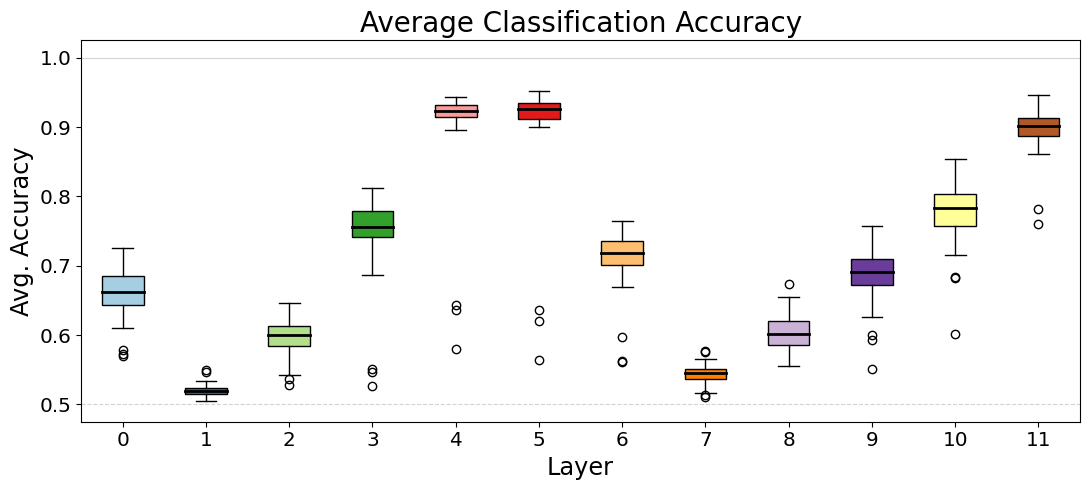

In [26]:
fig1, ax1 = plt.subplots(figsize = (11,5))
plt.tick_params(axis='both', which='major', labelsize='x-large')
plt.axhline(y = 0.5, color = 'lightgrey', linestyle = '--',lw = 0.8)
plt.axhline(y = 1, color = 'lightgrey', linestyle = '-',lw = 0.8)
ax1.set_title('Average Classification Accuracy', fontsize = 20)
bplot1 = ax1.boxplot(val, patch_artist=True)
ax1.set_ylabel('Avg. Accuracy', fontsize = 'xx-large')
ax1.set_xlabel('Layer', fontsize = 'xx-large')
plt.xticks(np.arange(1,13), [0,1,2,3,4,5,6,7,8,9,10,11])

# fill with colors
colors = [sns.color_palette("Paired")[0],sns.color_palette("Paired")[1],sns.color_palette("Paired")[2],sns.color_palette("Paired")[3],sns.color_palette("Paired")[4],
sns.color_palette("Paired")[5],sns.color_palette("Paired")[6],sns.color_palette("Paired")[7],sns.color_palette("Paired")[8],sns.color_palette("Paired")[9],
sns.color_palette("Paired")[10],sns.color_palette("Paired")[11]]

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot1['medians']:
    median.set(color='black', linewidth=2)
plt.tight_layout()
plt.savefig(f'/zhome/94/5/127021/speciale/master_project/src/visualization/figures/cav_avg_across_all_bar.pdf',format='pdf',pad_inches=0)
plt.show()